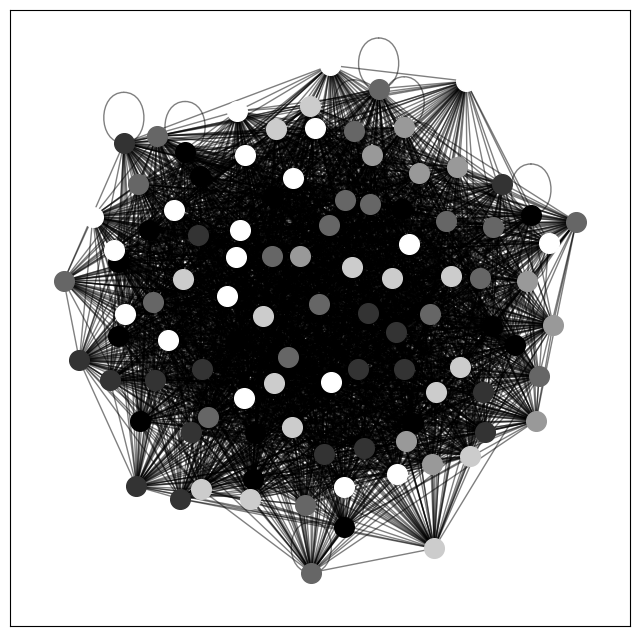

In [23]:
import pickle
import os
from collections import defaultdict
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt

# 创建一个示例网络
G = nx.Graph()
# 添加边，模拟社交联系
with open(os.getcwd() + "/../Data Preprocessor/Data/edges.pkl", "rb") as fin:
    edges = pickle.load(fin)
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[3], location=edge[2])

# 使用Louvain方法进行社区发现
partition = community_louvain.best_partition(G, weight="weight")
# 识别关键地点
location_risk = defaultdict(float)
for _, _, data in G.edges.data():
    location = data["location"]
    weight = data["weight"]  # 用作风险分数的一部分
    location_risk[location] += weight
# 绘制网络图和社区
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 8))
# 绘制节点
for community in set(partition.values()):
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == community]
    nx.draw_networkx_nodes(
        G,
        pos,
        list_nodes,
        node_size=200,
        node_color=str(community / max(partition.values())),
    )

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


community_list = dict()
for node, community in partition.items():
    cm = community_list.get(community, [])
    cm.append(node)
    community_list[community] = cm

In [26]:
# 根据社区情况，如成员数分配资源
maxNum = -1
maxIdx = -1
for idx, nodes in community_list.items():
    print(f"Community {idx} has {len(nodes)} people")
    if len(nodes) > maxNum:
        maxIdx = idx
        maxNum = len(nodes)

print(f"{maxIdx}社区所需要的资源最多，\n他们的成员是{community_list[maxIdx]}")

Community 0 has 17 people
Community 1 has 18 people
Community 2 has 21 people
Community 4 has 15 people
Community 5 has 20 people
Community 3 has 10 people
2社区所需要的资源最多，
他们的成员是['Dsymhmlh Duedvrzak', 'Jwtswowu Zoljc', 'Ntxilxcxi Yxqyq', 'Sbydo Olhscnin', 'Mdgob Sipseojag', 'Qdqelqygq Axlgodw', 'Hjpwlmmlx Mhsnfnc', 'Rvbicc Ebtnkb', 'Qttmsjqh Wqnlcit', 'Ilnhcoc Gmahqiut', 'Jpbhzfwyd Mbehxmyn', 'Jbqodjulu Gefoxsa', 'Ekycczzgi Ksyjuve', 'Lmchmkv Ghpquq', 'Rvshr Uykqkeefs', 'Mjgvhkg Glytbfs', 'Hnchnh Tjqnijvd', 'Nvjfvhgw Sppofgugg', 'Vrzlij Ojyznrpx', 'Kipsqlol Qxakspd', 'Knagxfaxe Ehpchey']


In [28]:
# 最大风险地点
maxNum = -1
maxIdx = -1
for idx, nodes in location_risk.items():
    print(f"{idx} is {nodes} risk")
    if nodes > maxNum:
        maxIdx = idx
        maxNum = nodes

print(f"{maxIdx}最具风险")

太阳花田 is 185.38083333333333 risk
Subway Line13 is 210.61999999999995 risk
守矢神社 is 116.29083333333331 risk
Subway Line1 is 135.59333333333333 risk
妖怪之山 is 119.85444444444444 risk
Subway Line15 is 177.38888888888889 risk
白玉楼 is 465.01000000000005 risk
Subway Line2 is 164.84444444444446 risk
Subway Line9 is 147.70888888888888 risk
Subway Line6 is 103.62222222222222 risk
地狱 is 550.4177777777779 risk
Subway Line12 is 145.58444444444444 risk
博丽神社 is 302.94777777777796 risk
Subway Line8 is 213.0666666666667 risk
Subway Line3 is 191.38444444444445 risk
灵莲洞 is 212.98583333333332 risk
Subway Line18 is 215.2822222222222 risk
魔法之森 is 137.74499999999995 risk
Subway Line7 is 220.58444444444453 risk
Subway Line19 is 196.38 risk
幻想乡 is 108.075 risk
永远亭 is 405.11138888888877 risk
Subway Line17 is 213.11555555555557 risk
天界 is 199.08777777777777 risk
冥界 is 124.18583333333333 risk
旧地狱街 is 242.24166666666665 risk
虹龙洞 is 282.9388888888889 risk
红魔馆 is 356.73611111111126 risk
Subway Line5 is 163.6355555555555